<a href="https://colab.research.google.com/github/karcherk/Python/blob/master/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
(a1,a2),(b1,b2)=[([3,4],[30,40]),([6,7],[60,70])]
print(a1,a2,b1,b2)
type(a1)

[3, 4] [30, 40] [6, 7] [60, 70]


list

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_sys', 'load_data']
4423680/4422102 [==============================] - 0s 0us/step
9


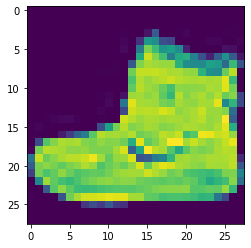

In [16]:
#tensorflow 와 tf.keras를 임포트
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


#패션MNIST 데이터는 keras의 데이터 셋에 있눈 이를 읽어와서 학습용,테스트 데이터로 구분
fashion_mnist = keras. datasets.fashion_mnist
print(dir(fashion_mnist))
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()


train_images.shape #28*28픽셀크기의 60000이미지 데이터

train_labels.shape #60000개의 라벨

train_images[0].shape #이미지 1개의 크기는 28*28픽셀

test_labels.shape

train_labels[:5] #훈련용 데이터의 5개의 레이블 확인 (0~9까지 10까지의 종류)

np.set_printoptions(linewidth=150)
train_images[0] #이미지는 넘파이 배열에 저장 되어있음, 한픽셀은 0~255값

class_names=['T-shirts/top','Trowser','Pullover','Dress','Coat','Sandal','Shirt','Sweater','Bag','Ankle Boat']
print(train_labels[0])
class_names[train_labels[0]] #라벨에 대응하는 품목이름 출력

plt.imshow(train_images[0])
plt.show()

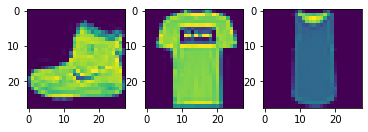

In [17]:
fig=plt.figure()
ax1=fig.add_subplot(1,3,1) #1행3열의 1번째위치에 배치
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
ax1.imshow(train_images[0])#첫번쨰 훈련용 데이터
ax2.imshow(train_images[1])#두번째 훈련용 데이터
ax3.imshow(train_images[2])#세번쨰 훈련용 데이터
plt.show()

In [54]:
#keras에 있는 Sequential 모델을 만들어서 Flatten 한줄로 늘어놓고 Dense층에 넣고 relu라는 비선형함수를 통과해서 나옴
#입력레이어, 히든레이어, 출력레이어로 구성
model = keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),  #Flatten 계층,784(28*28)인 1차원배열로 바꿔줌, 외부입력을 신경망으로 가져오는 역할
                         keras.layers.Dense(128,activation='relu'),  #히든레이어, 노드개수가 128개인 Dense 계층 활성화 relu활성화 함수 사용 계층을 더 추가해보자
                         keras.layers.Dense(10,activation='softmax') #출력레이어, 신경망의 출력을 와부로 전달, Dense계층 활성화 softmax활성화 함수 사용
])  #노드개수 10개의 노드 출력값의 핪이 1이 되도록 조정 됨,

In [62]:
model.compile(optimizer='adam',                         #adam(adaptive moment estimation)최적화 기법 사용
              loss='sparse_categorical_crossentropy', #손실함수
              metrics=['accuracy'])

#훈련데이터 모음을 가지고 한 번 훈련을 실시하는 것을 에폭(epoch)이라고 부름 , 훈련 5차례 실시
#에폭 단계마다 손실값과 정확 다 출력 됨, 훈련이 진행될수록 손실값은 줄어들고 예측의 정확도는 증가함
model.fit(train_images,train_labels,epochs=5)

#평가
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print("\n 테스트 : ", test_acc)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4758 - accuracy: 0.8405
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4739 - accuracy: 0.8389
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4727 - accuracy: 0.8399
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4600 - accuracy: 0.8421
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4670 - accuracy: 0.8415
313/313 - 0s - loss: 0.5393 - accuracy: 0.8242

 테스트 :  0.8241999745368958


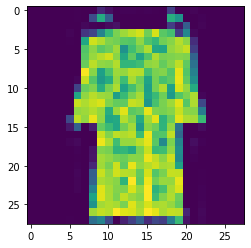

In [72]:
img=test_images[33]
label=test_labels[33]
img.shape#테스트 이미지가 2차원배열임을 확인함
plt.imshow(test_images[33])

[[1.3601574e-03 8.9451969e-03 4.8936465e-05 9.8668087e-01 2.9387723e-03 0.0000000e+00 2.5937319e-05 0.0000000e+00 1.5476540e-07 0.0000000e+00]]
3
Dress
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 2.7789172e-13 0.0000000e+00 0.0000000e+00]]
5


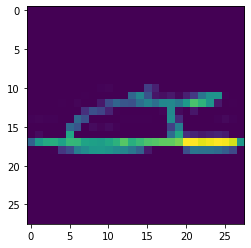

In [70]:
img1=np.around(test_images[33]/255,1)
img1


img=np.expand_dims(img,axis=0)#0번쨰 차원 추가
img.shape

img

test_images.shape




predic=model.predict(img)
print(predic)
print(np.argmax(predic))
print(class_names[np.argmax(predic)])

import numpy as np
randldx=np.random.randint(0,1000)#0에서 1000사이 임의수 발생시켜 테스트 이미지 선택
plt.imshow(test_images[randldx])

yhat = model.predict(test_images[randldx][np.newaxis,:,:])
print(yhat)
yhat=np.argmax(yhat)#10개의 출력 값중 가장 큰 값을 출력
print(yhat)